In [1]:
from loess import loess_1d
from scipy import interpolate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Coding3_Data.csv')

In [3]:
def smoother_diags(x):
    n = len(x)
    lev = np.zeros(n)
    for i in range(0, n):
        y = np.zeros(n)
        y[i] = 1
        #_, yi, _ = loess_1d.loess_1d(x, y, degree=2, frac=span)
        yi = interpolate.UnivariateSpline(x, y)(x)
        lev[i] = yi[i]
    return lev

In [4]:
def onestep_CV(x, y, span):
    n = len(x)
    xhat, yhat, weights = loess_1d.loess_1d(x, y, degree=2, frac=span)
    r = y - yhat
    Slam_diags = smoother_diags(x)
    cv = []
    for i, s in enumerate(Slam_diags):
        cv.append((r[i] / (1 - s))**2)
    
    gcv = []
    d = 1 - (np.sum(Slam_diags) / n)
    gcv = (r / d)**2
    
    return (np.mean(cv), np.mean(gcv))
    
   

In [5]:
 def loocv(x, y, spans):
    m = len(spans)
    cv = np.zeros(m)
    gcv = np.zeros(m)
    
    for i in range(0, m):
        cv[i], gcv[i] = onestep_CV(x, y, spans[i])
        #cv[i] = tmp[0]
        #gcv[i] = tmp[1]
    return (cv, gcv)
    
    

In [6]:
spans = np.linspace(0.20, 0.90, 15)
cv, gcv = loocv(df['x'].values, df['y'].values, spans)

In [7]:
print(f"CV: {cv}")
best_idx = np.where(cv == np.min(cv))[0][0]
print(f"Optimum span for CV: {spans[best_idx]}")
print(f"GCV: {gcv}")
best_idx = np.where(gcv == np.min(gcv))[0][0]
print(f"Optimum span for GCV: {spans[best_idx]}")

CV: [0.29972775 0.52354415 0.55587562 0.62882667 0.64562709 0.70105277
 0.70930172 0.94887086 0.95763468 1.08273338 1.09730116 1.26980524
 1.30841672 1.68118603 1.7577268 ]
Optimum span for CV: 0.2
GCV: [0.31756998 0.55274969 0.5892527  0.66468567 0.67786118 0.74180396
 0.75634724 0.97698582 0.98399465 1.0631927  1.06796384 1.22654508
 1.25462335 1.59460589 1.67490873]
Optimum span for GCV: 0.2


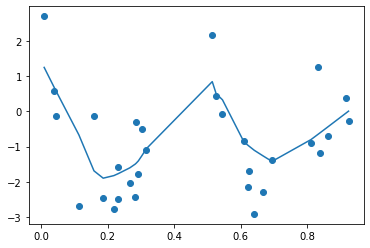

In [13]:
plt.scatter(df['x'], df['y'])
_, ys, _ = loess_1d.loess_1d(df['x'].values, df['y'].values, degree=2, frac=0.5)
plt.plot(df['x'], ys)

In [14]:
smoother_diags(df['x'].values)

array([0.40348941, 0.25227003, 0.23121305, 0.10175003, 0.08408792,
       0.08367289, 0.08637081, 0.08762399, 0.08765247, 0.08974919,
       0.08995608, 0.08993216, 0.08983254, 0.08950176, 0.08877351,
       0.08786867, 0.08990329, 0.09369114, 0.10652391, 0.10850786,
       0.10865517, 0.11056678, 0.11182916, 0.11075769, 0.10219423,
       0.11187458, 0.11632892, 0.14396473, 0.29918384, 0.3422742 ])